In [33]:
import tensorflow as tf

In [34]:
physical_devices= tf.config.list_physical_devices('GPU')
physical_devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [35]:
tf.config.set_visible_devices(physical_devices[0], 'GPU') # Uso gpu 0

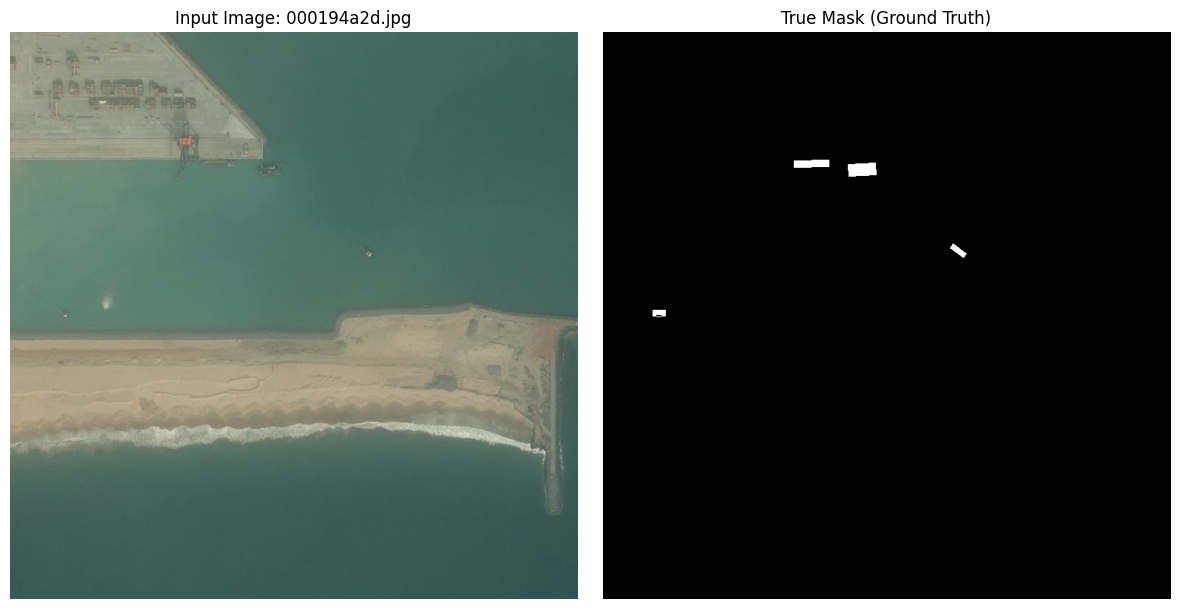

In [27]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
sys.path.append(os.path.abspath(".."))
from PIL import Image
from src.data_loader import rle_decode
from src.utils import visualizar_muestra

PATH_CSV = '../data/train_ship_segmentations_v2.csv'
PATH_TRAIN = '../data/train_v2/'

#ImageId,EncodedPixels

df = pd.read_csv(PATH_CSV)

sample_id = '000194a2d.jpg' 
img_rles = df[df['ImageId'] == sample_id]['EncodedPixels'].tolist()

mask_full = np.zeros((768, 768))
for rle in img_rles:
    mask_full += rle_decode(rle)
#Creamos una mascara vacia y por cada barco, es decir por cada fila de img_rles 
#pintamos el barco
    
    
img_pixel = Image.open(os.path.join(PATH_TRAIN, sample_id))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(img_pixel)
ax[0].set_title(f"Input Image: {sample_id}")
ax[0].axis('off')

ax[1].imshow(mask_full, cmap='gray')
ax[1].set_title("True Mask (Ground Truth)")
ax[1].axis('off')

plt.tight_layout()
plt.show()

In [28]:
df_with_ships = df.dropna(subset=['EncodedPixels']) # Numero de barcos encontrados
images_with_ships = df_with_ships['ImageId'].unique()

df_without_ships = df[df['EncodedPixels'].isna()]

list_all_images = df['ImageId'].unique()

print(f"Total imagenes para entrenamiento {len(list_all_images)}")
print(f"total imagenes con barco {len(images_with_ships)}")
print(f"total imagenes sin barco: {len(df_without_ships)}")

Total imagenes para entrenamiento 192556
total imagenes con barco 42556
total imagenes sin barco: 150000


In [29]:
print(f"Numero medio de barcos en las imagenes con barco: {len(df_with_ships)/len(images_with_ships)}")
print(f"Porcentaje de imagenes con barco: {len(images_with_ships)/len(list_all_images)} %")

Numero medio de barcos en las imagenes con barco: 1.9203637559921045
Porcentaje de imagenes con barco: 0.2210058372629261 %


In [30]:
top_ship_images = df.dropna(subset=['EncodedPixels']).groupby('ImageId').count()

top_3_ids = top_ship_images.sort_values('EncodedPixels', ascending=False).head(3).index.tolist()

for i, img_id in enumerate(top_3_ids):
    n_ships = top_ship_images.loc[img_id, 'EncodedPixels']
    print(f"Top {i+1}: {img_id} con {n_ships} barcos.")

Top 1: 16ccec57a.jpg con 15 barcos.
Top 2: ad5092ca2.jpg con 15 barcos.
Top 3: 02776139a.jpg con 15 barcos.


Top 1:


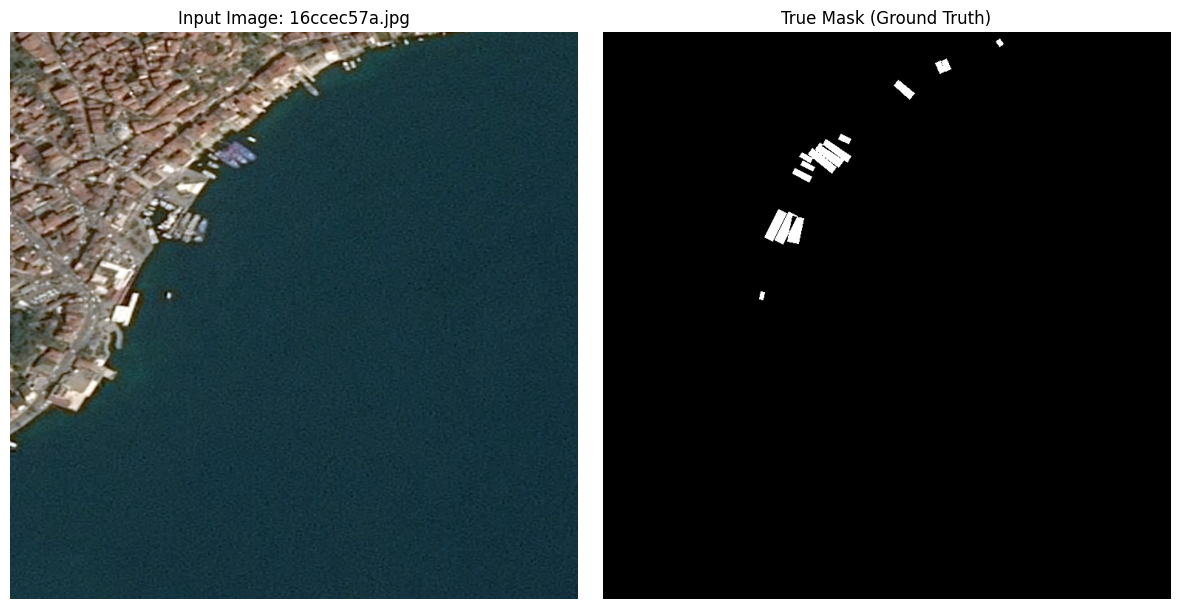

Top 2:


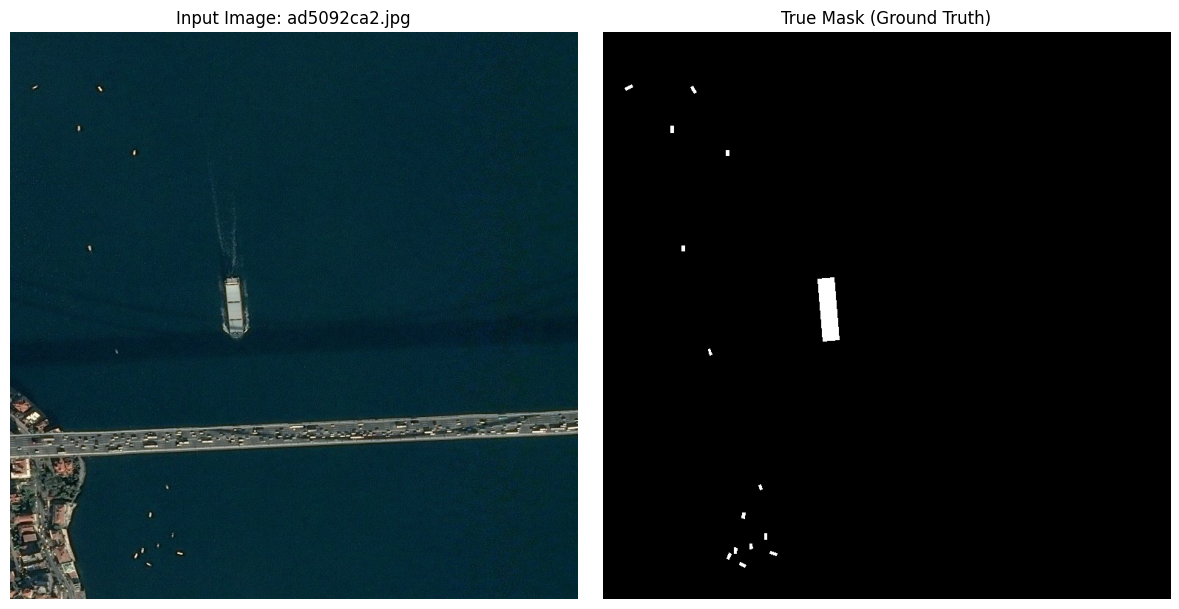

Top 3:


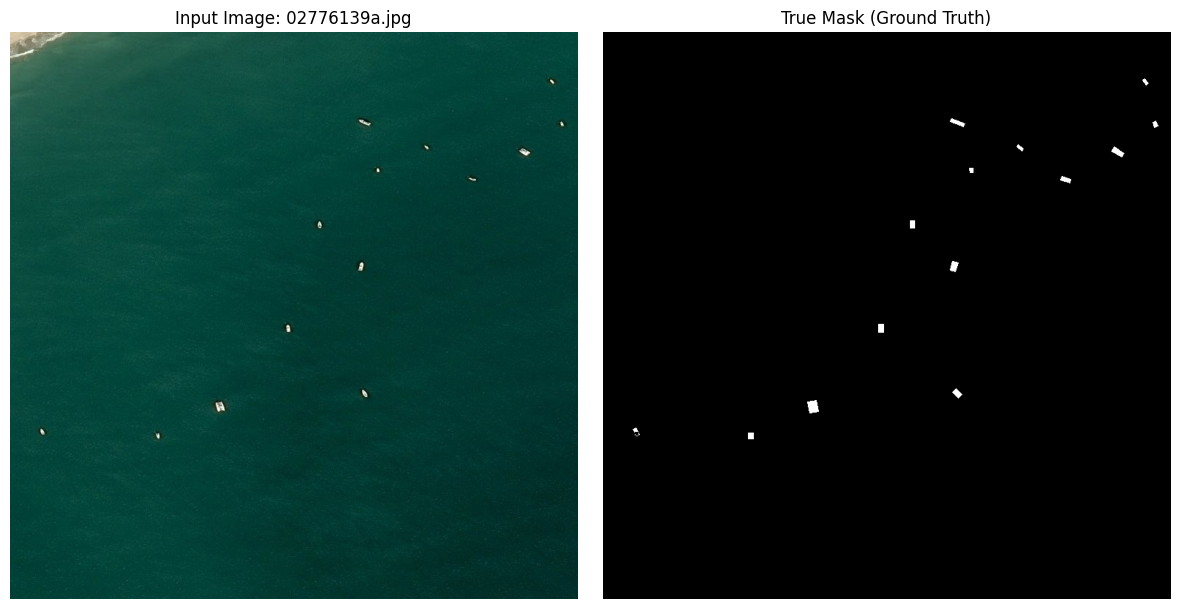

In [31]:
for i, img_id in enumerate(top_3_ids):
    print(f"Top {i+1}:")
    visualizar_muestra(img_id, df, PATH_TRAIN)

In [32]:
ship_table = df_with_ships.groupby('ImageId').size().reset_index(name= 'num_ships')
ship_table = ship_table.sort_values(by='num_ships', ascending=False).reset_index(drop=True)
print(ship_table['num_ships'].value_counts())

num_ships
1     27104
2      7674
3      2954
4      1622
5       925
6       657
7       406
8       318
9       243
10      168
11      144
12      124
14       76
13       75
15       66
Name: count, dtype: int64
